<a href="https://colab.research.google.com/github/RobertJaro/introduction_machine_learning/blob/master/MachineLearningIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Concept - Gradient Descent

As a simple introduction to the mathematical foundation of machine learning we view the task of fitting a linear regression. 

In [0]:
import numpy as np
from matplotlib import pyplot as plt

Data points are randomly sampled along a straight line.

In [0]:
train_x = np.random.uniform(0, 10, size=50)
train_y = [np.random.normal(val + 5, 0.5) for val in train_x]

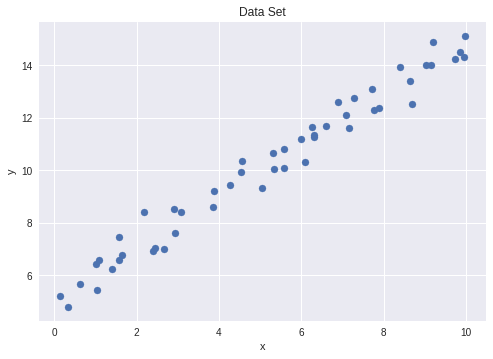

In [25]:
plt.scatter(train_x, train_y)
plt.title("Data Set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

For gradient descent we need a loss function to measure the difference between the prediction and the real value. In this example we choose a quadratic loss (eucledian metric).

>$loss = E =\frac{1}{2} |y_{pred}-y|^2$

For this problem we use a simple regression model:

>$y_{pred} = w x + b$

Gradient descent can be used to determine the free parameters $w$ and $b$. By evaluating the derivative of the loss function with respect to the parameter, the amount of change of the loss function can be evaluated when changing this parameter. To minimize the loss function the parameter is adjusted in the oposite direction of the largest change. The learning rate ($\eta$) defines the step size for each update. We iteratively apply our update algorithm ($y_{pred}$ denotes the predicted value and $y$ the real value):

>$w_{new} = w_{old} - \eta \frac{dE}{dw} = w_{old} - \eta (y_{pred}-y)x$

>$b_{new} = b_{old} - \eta \frac{dE}{dw} = b_{old} - \eta (y_{pred} - y)$

The correct selection of the learning rate is important for the success of this algorithm. The free parameters are initialized randomly.

The decreas of the loss function during the training can be seen in the figure below.

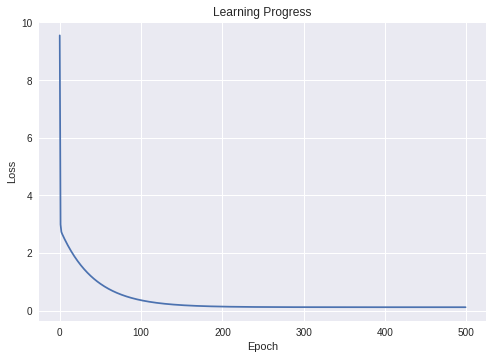

In [26]:
w = np.random.rand()
b = np.random.rand()
lr = 0.001

learning_progress = []
for epoch in range(500):
  losses = []
  for i in range(len(train_x)):
    x = train_x[i]
    y = train_y[i]
    y_pred = x * w + b

    loss = 0.5 * (y_pred - y)**2

    w = w - lr * (y_pred - y) * x
    b = b - lr * (y_pred - y)

    losses.append(loss)
  learning_progress.append(np.mean(losses))
  
plt.title("Learning Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(learning_progress)), learning_progress)
plt.show()

To validate our training success we draw the resulting prediction line.

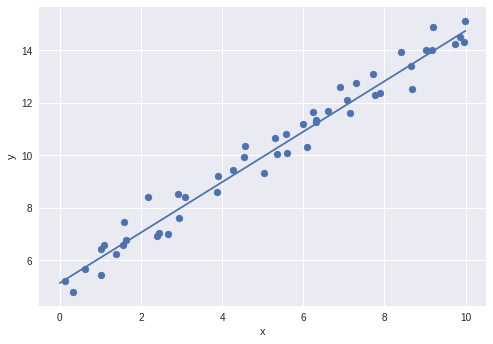

In [27]:
plt.scatter(train_x, train_y)

x_test = range(11)
y_prediction = [w*x+b for x in x_test]

plt.plot(x_test, y_prediction)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Classification in 2D

The previous example can easily be extended for 2D application. In this example we use samples from two different gaussian distributions.

In [0]:
from sklearn.utils import shuffle

In [0]:
def gaussian_2d(x_mean, y_mean, mu):
  x = np.random.normal(x_mean, mu)
  y = np.random.normal(y_mean, mu)
  return (x, y)

In [0]:
# create the two sample distributions
data_points_1 = np.array([gaussian_2d(1, 1, 0.5) for _ in range(50)])
data_points_2 = np.array([gaussian_2d(-1, -1, 0.5) for _ in range(50)])

# create training data and shuffle the dataset
train_x = np.concatenate([data_points_1, data_points_2])
train_y = np.array([0] * 50 + [1] * 50)
train_x, train_y = shuffle(train_x, train_y)

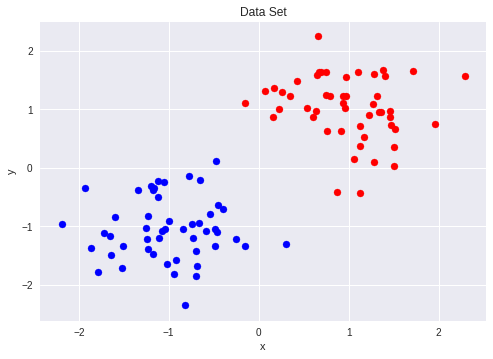

In [31]:
plt.scatter(data_points_1[:, 0], data_points_1[:, 1], color="red")
plt.scatter(data_points_2[:, 0], data_points_2[:, 1], color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Set")
plt.show()

To seperate the two distributions we can use the algorithm from the previous example and replace the multiplications with dot products. The scalar w is replaced with a 2x1 matrix. Since we are dealing now with vectors the derivative is replaced with the gradient operator. Again we update in the opposite direction of the largest change of the gradient.

>$W_{new} = W_{old} - \eta \nabla_WE = w_{old} - \eta (y_{pred}-y) \vec{x}$




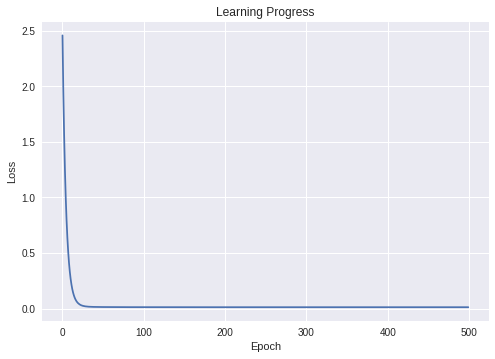

In [32]:
w = np.random.rand(2,)
b = np.random.rand()
lr = 0.0005

learning_progress = []
for epoch in range(500):
  losses = []
  for i in range(len(train_x)):
    x = train_x[i]
    y = train_y[i]
    y_pred = np.dot(x, w) + b
    
    loss = 0.5 * (y_pred - y)**2

    w = w - lr * (y_pred - y) * x
    b = b - lr * (y_pred - y)
    

    losses.append(loss)
  learning_progress.append(np.mean(losses))
  
plt.title("Learning Progress")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(len(learning_progress)), learning_progress)
plt.show()

The resulting prediction can be seen in the figure below. The background color gives the prediction in the corresponding area.

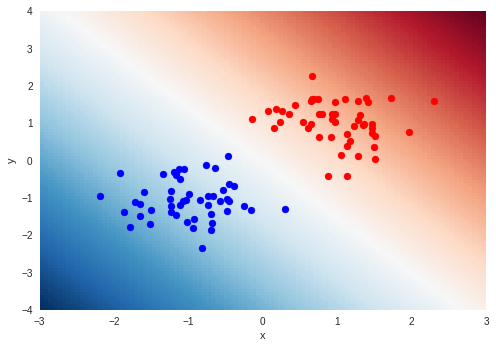

In [33]:
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-4, 4, 100))
prediction = np.array([[np.dot([x, y], w) + b for x in np.linspace(-1, 1, 100)] for y in np.linspace(-1, 1, 100)])


plt.xlabel("x")
plt.ylabel("y")

plt.pcolor(x,y,prediction.reshape(100, 100), cmap="RdBu")

plt.scatter(data_points_1[:, 0], data_points_1[:, 1], color="red")
plt.scatter(data_points_2[:, 0], data_points_2[:, 1], color="blue")

plt.show()